In [23]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
labels = pd.read_csv('gender_submission.csv')

In [97]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
labels.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
#Соединим вместе тренировочный и тестовый датасеты. 

#1. Сделаем джоин data_test и labels по полю PassengerId
test = pd.merge(data_test, labels, left_on='PassengerId', right_on='PassengerId')

#2. Соединм получившийся датафрейм и data_train
data = pd.concat([data_train, test], sort=True).reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     1309 non-null   int64  
 11  Ticket       1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [100]:
data.head(20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736


In [34]:
#Мы видим, что много пропущенных данных у атрибутов Age и Cabin

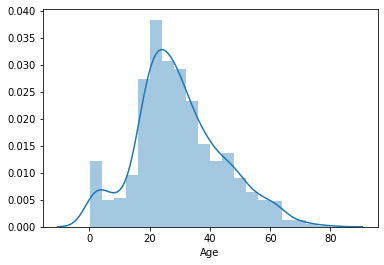

In [38]:
sns.distplot(data.Age, bins=20)

In [4]:
#Мы видим, что распределение смещено влево и поэтому мы заполним пустые строки значением медианы, а не средним значением
data.Age = data.Age.fillna(data.Age.median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     1309 non-null   int64  
 11  Ticket       1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [78]:
#Посмотрим какие значения есть у атрибута Cabin
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Как можем видеть атрибут Cabin обозначает зону коробля, где находилась кабина и собствено номер кабины. Думаю возможно найти закономерность между стоимостью билета, классом пассажира (pclass) и зоной коробля и заполнить пробелы в данных, но это полагаю вне скопа задания, поэтому предлагаю просто исключить атрибут Cabin из фичей

In [5]:
#Сделаем dropda для оставшихся пустых значений

data = data[['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Survived']]
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1306 non-null   float64
 1   Embarked  1306 non-null   object 
 2   Fare      1306 non-null   float64
 3   Parch     1306 non-null   int64  
 4   Pclass    1306 non-null   int64  
 5   Sex       1306 non-null   object 
 6   SibSp     1306 non-null   int64  
 7   Ticket    1306 non-null   object 
 8   Survived  1306 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 102.0+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data['Sex_cat'] = labelencoder.fit_transform(data['Sex'])
data['Embarked_cat'] = labelencoder.fit_transform(data['Embarked'])
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Ticket,Survived,Sex_cat,Embarked_cat
0,22.0,S,7.2500,0,3,male,1,A/5 21171,0,1,2
1,38.0,C,71.2833,0,1,female,1,PC 17599,1,0,0
2,26.0,S,7.9250,0,3,female,0,STON/O2. 3101282,1,0,2
3,35.0,S,53.1000,0,1,female,1,113803,1,0,2
4,35.0,S,8.0500,0,3,male,0,373450,0,1,2


In [7]:
#Разделим данные на тренировочные и тестовые

from sklearn.model_selection import train_test_split



X = data[['Age', 'Fare', 'Parch', 'Pclass', 'Sex_cat', 'SibSp', 'Embarked_cat']]
X.dropna
y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)


# Создаим дерево решений

In [8]:
from sklearn.tree import DecisionTreeClassifier


In [15]:
tree = DecisionTreeClassifier(max_depth=7)

In [11]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 1.2 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=6d4090c5c4a07bf26833f5b89769a3266fbae1ce6c6160b16837f77ef18b6189
  Stored in directory: /Users/Dmitry/Library/Caches/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [16]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


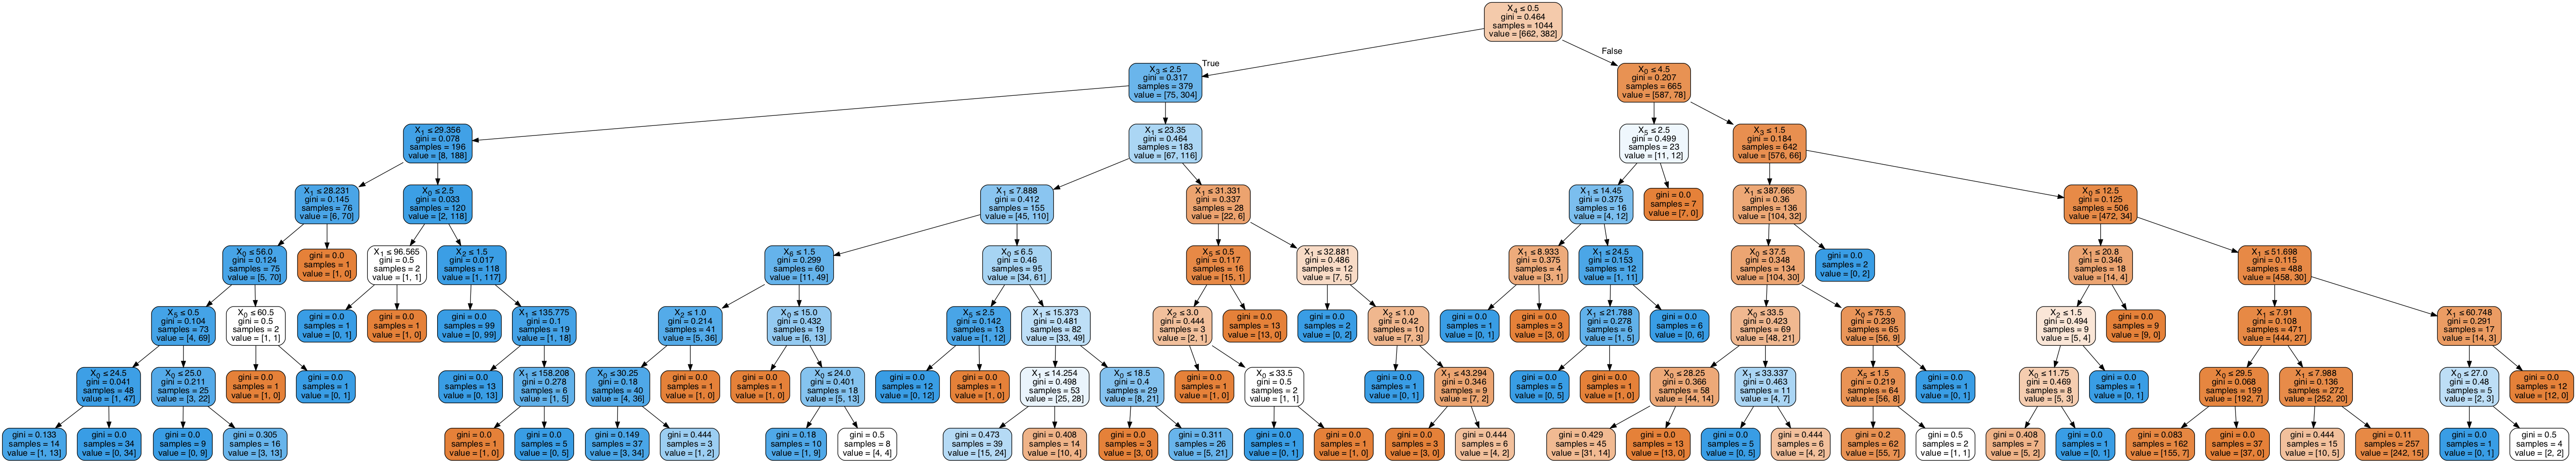

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [17]:
#Похоже мы переборщили с глубиной дерева, но попробуем все равно посмотреть какой score
score = tree.score(x_test, y_test)
score

0.8320610687022901

In [12]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

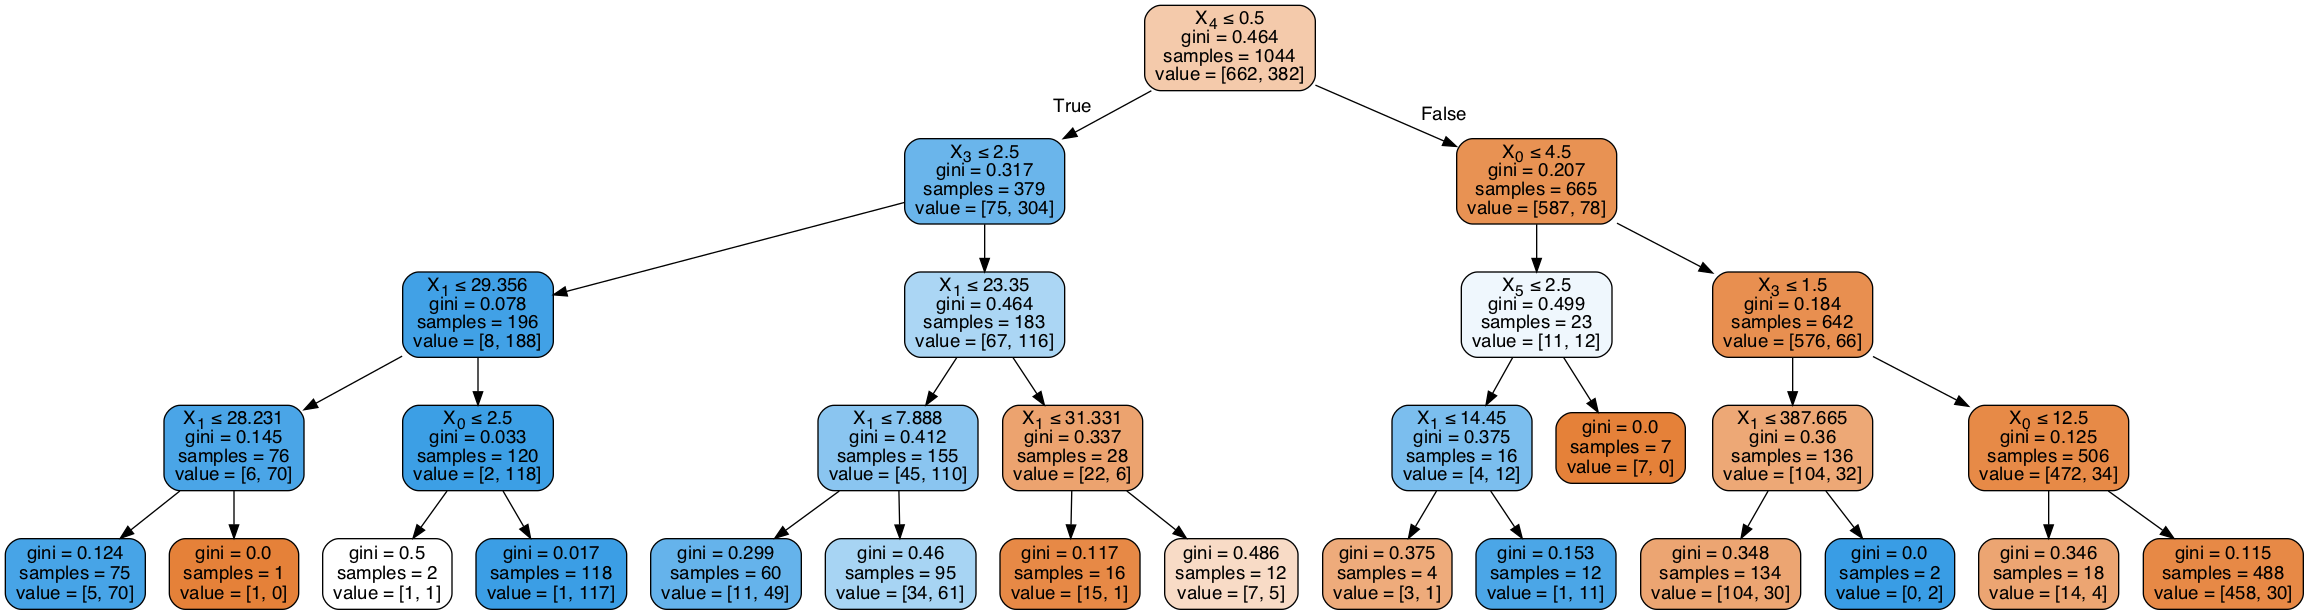

In [13]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
score = tree.score(x_test, y_test)
score

0.8549618320610687

А если еще уменшить глубину

In [18]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

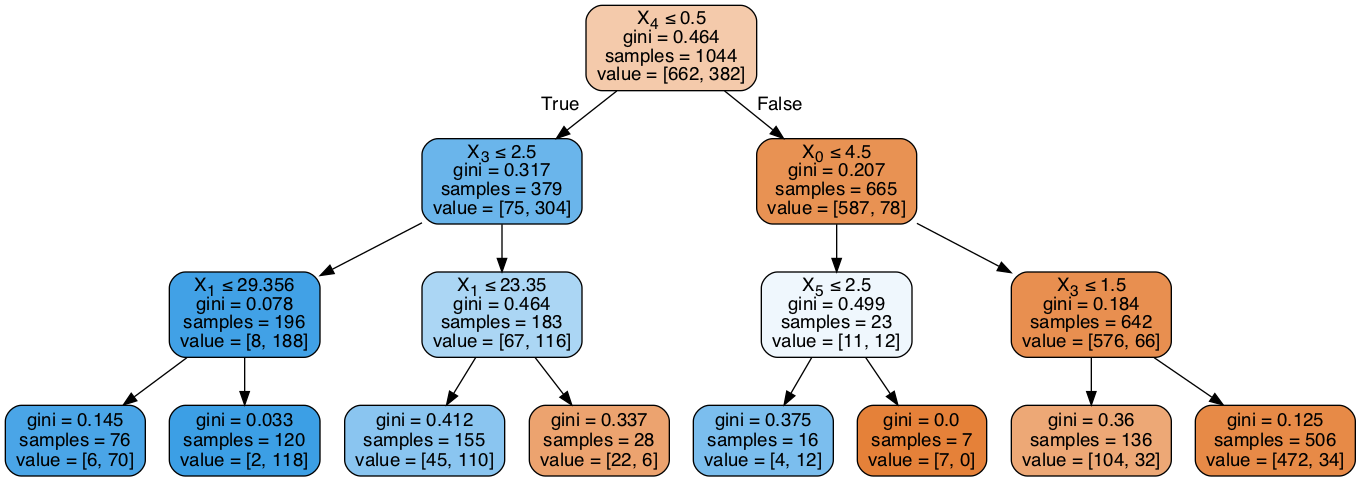

In [19]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [20]:
score = tree.score(x_test, y_test)
score

0.8625954198473282

# Оценка важности фичей

([<matplotlib.axis.YTick at 0x1a207dbbd0>,
 <a list of 7 Text yticklabel objects>)

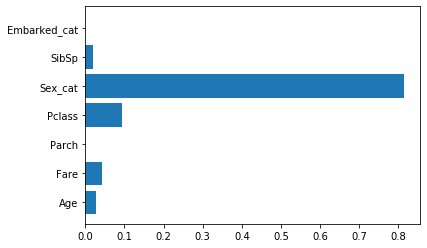

In [24]:
plt.barh(np.arange(len(tree.feature_importances_)), tree.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)

Может заключить, что из использованных фичей наибльшее влияние имеет пол пассажира и на втором месте идет класс пассажира